# Propensity Score Matching / Uplifting

In this tutorial, we are going to see how to estimate causal effects when the treatment is not *unconditionally* randomly assigned, but we need to condition on observable features in order to assume treatment exogeneity. This might happen either when an experiment is stratified or in observational studies.

**Requisites**

For this tutorial, I assume you are familiar with the following concepts:

- Rubin's potential outcome framework
- Ordinary least squares regression

**Academic Application**

As an academic application, we are going to replicate [Evaluating the Econometric Evaluations of Training Programs with Experimental Data](https://www.jstor.org/stable/2937954) (1986) by Lalonde and the followup paper [Causal Effects in Non-Experimental Studies: Reevaluating the Evaluation of Training Programs](https://www.tandfonline.com/doi/abs/10.1080/01621459.1999.10473858) (1999) by Dahejia and Wahba. These papers study a randomized intervention providing work experienced to improve labor market outcomes. 

**Business Case**

TBD

## Setting

We assume that for a set of i.i.d. subjects $i = 1, ..., n$ we observed a tuple $(X_i, D_i, Y_i)$ comprised of 

- a feature vector $X_i \in \mathbb R^n$
- a treatment assignment $D_i \in \lbrace 0, 1 \rbrace$
- a response $Y_i \in \mathbb R$

**Assumption 1 : unconfoundedness** (or ignorability, or selection on observables, or conditional independence)

$$
\big \lbrace Y_i^{(1)} , Y_i^{(0)} \big \rbrace \ \perp \ D_i \ | \ X_i
$$

i.e. conditional on observable characteristics $X$, the treatment assignment $T$ is as good as random. What this assumption rules out is *selection on unobservables*. Moreover, it's *untestable*.

**Assumption 2: overlap** (or common support)

$$
\exists \eta > 0 \ : \ \eta \leq \mathbb E \left[ D_i = 1 \ \big | \ X_i = x \right] \leq 1-\eta
$$

i.e. no observation is deterministically assigned to the treatment or control group. We need this assumption for counterfactual statements to make sense. If some observations had zero probability of (not) being treated, it would make no sense to try to estimate their counterfactual outcome in case they would have (not) being treated. Also this assumption is *untestable*.

**Assumption 3: stable unit treatment value (SUTVA)**

$$
Y_i^{(D_i)} \perp D_j \quad \forall j \neq i
$$

i.e. the potential outcome of one individual is independent from the treatment status of any other individual. Common *violations* of this assumption include

- general equilibrium effects
- spillover effects

This assumption is *untestable*.

## Propensity Scores

### Exogenous Treatment

The **fundamental problem of causal inference** is that we do not observe counterfactual outcomes, i.e. we do not observe what would have happened to treated units if they had not received the treatment and viceversa. 

If treatment is exogenous, we know that the difference in means identifies the average treatment effect $\mathbb E[\tau]$.

$$
\mathbb E[\tau] = \mathbb E \big[ Y_i \ \big| \ D_i = 1 \big] - \mathbb E \big[ Y_i \ \big| \ D_i = 0 \big] = \mathbb E \big[ Y_{i}^{(1)} - Y_{i}^{(0)} \big]
$$

Therefore, we can build an unbiased estimator of the average treatment effect as the empirical counterpart of the expression above

$$
\hat \tau(Y, D) = \frac{1}{n} \sum_{i=1}^{n} \big( D_i Y_i - (1-D_i) Y_i \big)
$$

In case treatment is not randomly assigned, we use the Thompson Horowitz (1952) estimator

$$
\hat \tau(Y, D) = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{D_i Y_i}{\pi_{i}} - \frac{(1-D_i) Y_i}{1 - \pi_{i}} \right)
$$

where $\pi_{i} = \Pr(D_i=1)$ is the probability of being treated, also known as **propensity score**. Sometimes the propensity score is known, for example when treatment is stratified. However, in general, it is not.

### Conditionally Exogenous Treatment

In many cases and especially in observational studies, treatment $D$ is not unconditionally exogenous, but it's exogenous only after we condition on some characteristic $X$. If these characteristics are observables, we have the **unconfoundedness** assumption.

Under unconfoundedness, we can still identify the average treatment effect, as a *conditional* difference in means:

$$
\mathbb E[\tau] = \mathbb E \big[ Y_{i}^{(1)} - Y_{i}^{(0)} \ \big| \ X_i \big]
$$

The main problem is that we need to condition of the observables that actually make the unconfoundedness assumption hold. This might be tricky in two cases:

1. when we have many observables
2. when we do not know the functional form of the observables that we need to condition on

The main contribution of Rosenbaum and Rubin (1983) is to show that if **unconfoundedness** holds, then 

$$
\big \lbrace Y_i^{(1)} , Y_i^{(0)} \big \rbrace \ \perp \ D_i \ | \ \pi(X_i)
$$

i.e. you only need to condition on $\pi(X)$ in order to recover the average treatment effect. 

$$
\mathbb E[\tau] = \mathbb E \big[ Y_{i}^{(1)} - Y_{i}^{(0)} \ \big| \ \pi(X_i) \big]
$$

This implies the following **inverse propensity-weighted** estimator:

$$
\hat \tau^{IPW} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{D_i Y_i}{\hat \pi(X_i)} - \frac{(1-D_i) Y_i}{1 - \hat \pi(X_i)} \right)
$$

which, under *unconfoundedness* is an **unbiased** estimator of the average treatment effect, $\mathbb E \left[\hat \tau^{IPW} \right] = \tau$.

This is a very practically relevant result since it tells us that we need to condition on a single variable instead of a potentially infinite dimensional array. The only thing we need to do is to estimate $\pi(X_i)$.

###  Comments

**Actual vs Estimated Scores**

Hirano and Ridder (2002) show that even when you know the true propensity score $\pi(X)$, it's better to plug in the estimated propensity score $\hat \pi(X)$. Why? The idea is that the deviation between the actual and the estimated propensity score is providing some additional information. Therefore, it is best to use the actual fraction of treated rather than the theoretical one. 

**Propensity Scores and Regression**

What is the difference between running a regression with controls vs doing propensity score matching?

Aranow and Miller (2015) investigate this comparison in depth. First of all, whenever you are inserting **control variables** in a regression, you are implicitly thinking about propensity scores. Both approaches are implicitly estimating counterfactual outcomes. Usually OLS extrapolates further away from the actual support than propensity score does.

In the tweet (and its comments) below you can find further discussion and comments.

{{< tweet user="paulgp" id="1470787510091632651" >}}



## Academic Application

As an academic application, we are going to replicate [Causal Effects in Non-Experimental Studies: Reevaluating the Evaluation of Training Programs](https://www.tandfonline.com/doi/abs/10.1080/01621459.1999.10473858) (1999) by Dahejia and Wahba.

This study builds on a previous study: [Evaluating the Econometric Evaluations of Training Programs with Experimental Data](https://www.jstor.org/stable/2937954) (1986) by Lalonde. In this study, the author compares observational and experimental methods. In particular, he studies an experimental intervention called the NSW (National Supported Work demonstration). The NSW is a temporary training program to give work experience to unemployed people.

The exogenous variation allows us to estimate the treatment effect as a difference in means. The author then asks: what if we didn't have access to an experiment? In particular, what if we did not have information on the control group? He takes a sample of untreated people from the PSID panel and use them as a control group.

### Experimental Data

Let's start by loading the NSW data.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from src.utils import *

In [3]:
df_nsw = pd.read_csv('data/l86_nsw.csv')
df_nsw.head()

,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
0,1,37,11,1,0,1,1,0.0,0.0,9930.045898
1,1,22,9,0,1,0,1,0.0,0.0,3595.894043
2,1,30,12,1,0,0,0,0.0,0.0,24909.449219
3,1,27,11,1,0,0,1,0.0,0.0,7506.145996
4,1,33,8,1,0,0,1,0.0,0.0,289.789886


The treatment variable is `treat` and the outcome of interest is `re78`, the income in 1978. We also have access to a bunch of covariates.

In [4]:
y = 're78'
T = 'treat'
X = df_nsw.columns[2:9]

Was there selection on observables? Let's summarize the data, according to treatment status.

In [5]:
df_nsw.groupby('treat').agg(['mean', 'std']).T.unstack(1)

treat               0                         1             
                 mean          std         mean          std
age         25.053846     7.057745    25.816216     7.155019
educ        10.088462     1.614325    10.345946     2.010650
black        0.826923     0.379043     0.843243     0.364558
hisp         0.107692     0.310589     0.059459     0.237124
marr         0.153846     0.361497     0.189189     0.392722
nodegree     0.834615     0.372244     0.708108     0.455867
re74      2107.026651  5687.905639  2095.573693  4886.620354
re75      1266.909015  3102.982088  1532.055313  3219.250879
re78      4554.801120  5483.836001  6349.143502  7867.402183

It seems that covariates are balanced across treatment arms. Nothing seems to point towards selection on observables. Therefore, we can compute the average treatment effect as a simple difference in means

In [6]:
df_nsw.loc[df_nsw[T]==1, y].mean() - df_nsw.loc[df_nsw[T]==0, y].mean()

1794.3423818501024

Or equivalently in a regression

In [7]:
est = smf.ols('re78 ~ treat', df_nsw).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4554.8011,408.046,11.162,0.000,3752.855,5356.747
treat,1794.3424,632.853,2.835,0.005,550.574,3038.110


It looks like the effect is positive and significant.

### Observational Data

Let's now load a different dataset in which we have replaced the true control units with observations from the PSID sample.

In [8]:
df_psid = pd.read_csv('data/l86_psid.csv')

Is this dataset balanced?

In [9]:
df_psid.groupby('treat').agg(['mean', 'std']).T.unstack(1)

treat                0                          1             
                  mean           std         mean          std
age          36.094862     12.081030    25.816216     7.155019
educ         10.766798      3.176827    10.345946     2.010650
black         0.391304      0.489010     0.843243     0.364558
hisp          0.067194      0.250853     0.059459     0.237124
marr          0.735178      0.442113     0.189189     0.392722
nodegree      0.486166      0.500799     0.708108     0.455867
re74      11027.303390  10814.670751  2095.573693  4886.620354
re75       7569.222058   9041.944403  1532.055313  3219.250879
re78       9995.949977  11184.450050  6349.143502  7867.402183

People in the PSID control group are older, more educated, white, married and generally have considerably higher pre-intervention earnings (`re74`). This makes sense since the people selected for the NSW program are people that are younger, less experienced and unemployed. 

Lalonde (1986) argues in favor of experimental approaches by showing that using a non-experimental setting, one would not be able to estimate the true treatment effect. Actually, one could even get statistically significant results of the opposite sign.

Let's repeat the regression exercise for the PSID data.

In [10]:
smf.ols('re78 ~ treat', df_psid).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9995.9500,623.715,16.026,0.000,8770.089,1.12e+04
treat,-3646.8065,959.704,-3.800,0.000,-5533.027,-1760.586


The estimated coefficient is negative and significant. The conclusion from Lalonde (1986) is

> "This comparison shows that many of the econometric procedures d not replicate the experimentally determined results".

Dahejia and Wahba (1999) argue that with appropriate matching one would still be able to get a relatively precise estimate of the treatment effect. In particular, the argue in favor of controlling for pre-intervention income, `re74` and `re75`. 

Let's just linearly insert the control variables in the regression.

In [11]:
smf.ols('re78 ~ treat + ' + ' + '.join(X), df_psid).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1089.9263,2913.224,-0.374,0.708,-6815.894,4636.042
treat,2642.1456,1039.655,2.541,0.011,598.694,4685.597
educ,521.5869,208.751,2.499,0.013,111.284,931.890
black,-1026.6762,1006.433,-1.020,0.308,-3004.830,951.478
hisp,-903.1023,1726.419,-0.523,0.601,-4296.394,2490.189
marr,1026.6143,943.788,1.088,0.277,-828.410,2881.639
nodegree,-1469.3712,1166.114,-1.260,0.208,-3761.379,822.637
re74,0.1928,0.058,3.329,0.001,0.079,0.307
re75,0.4976,0.070,7.068,0.000,0.359,0.636


The treatment effect is now positive, borderline significant, and close to the experimental estimate of $1794\$$. Moreover, it's hard to tell whether this is the correct functional form for the control variables.

### Inverse propensity score weighting

Another option is to use **inverse propensity score weighting**. First, we need to estimate the treatment probability. Let's start with a very simple standard model to predict binary outcomes.

In [12]:
from sklearn.linear_model import LogisticRegressionCV

pi = LogisticRegressionCV().fit(y=df_psid[T], X=df_psid[X])
df_psid['pscore'] = pi.predict_proba(df_psid[X])[:,1]

How does the distribution of the propensity scores look like?

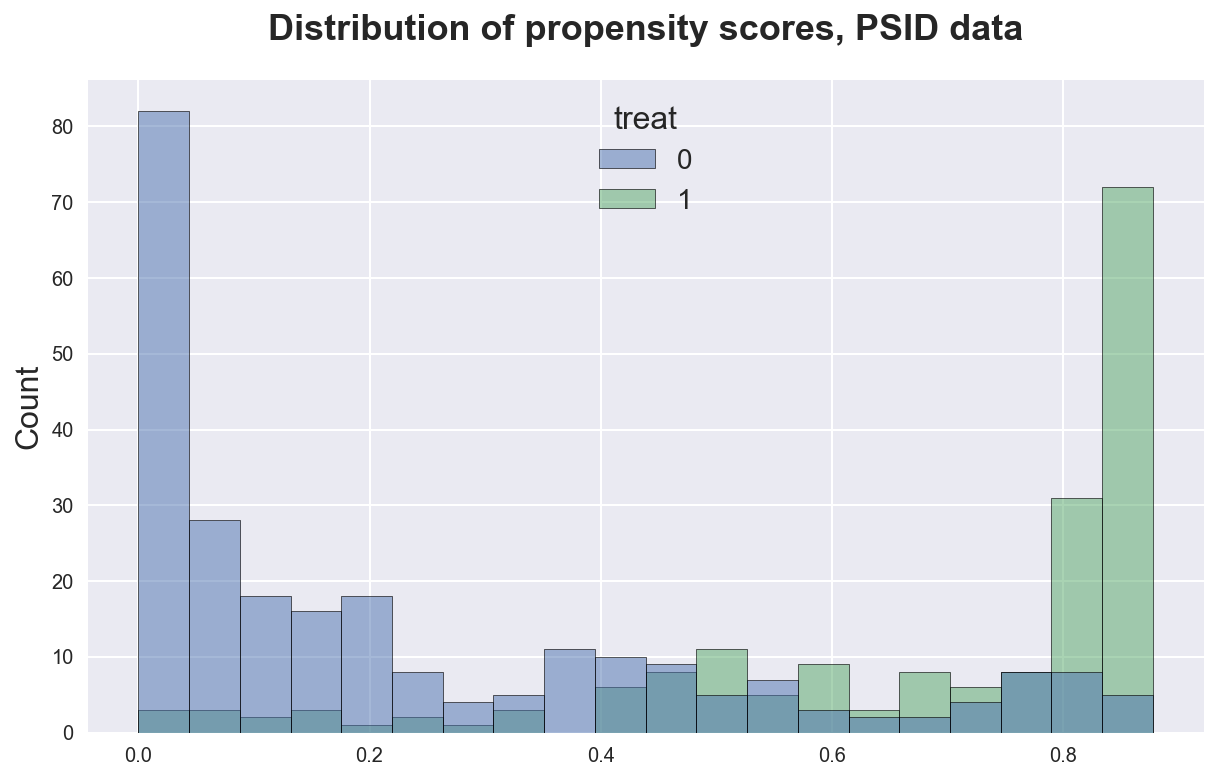

In [13]:
sns.histplot(data=df_psid, x='pscore', hue=T, bins=20)\
.set(title='Distribution of propensity scores, PSID data', xlabel='');

It seems that indeed we predict higher propensity scores for treated people, and viceversa, indicating a strong selection on observable. However, there is also a considerable amount of overlap. 

We can now estimate the treatment effect by weighting by the inverse of the propensity score. First, let's exclude observations with a very extreme predicted score.

In [14]:
df_psid1 = df_psid[(df_psid['pscore']<0.9) & (df_psid['pscore']>0.1)]

Now we can need to construct the weights.

In [15]:
df_psid1['weight'] = df_psid1['treat'] / df_psid1['pscore'] + (1-df_psid1['treat']) / (1-df_psid1['pscore'])

Finally, we run a weighted regression of income on the treatment program.

In [16]:
est = smf.wls('re78 ~ treat', df_psid1, weights=df_psid1['weight']).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4038.1507,512.268,7.883,0.000,3030.227,5046.074
treat,2166.8750,730.660,2.966,0.003,729.250,3604.500


The effect is positive, statistically significant and very close to the experimental estimate of $1794\$$.

What would have been the propensity scores if we had used the NSW experimental sample? If it's a well done experiment with a sufficiently large sample, we would expect the propensity scores to concentrate around the percentage of people treated, $0.41$ in our data.

In [17]:
pi = LogisticRegressionCV().fit(y=df_nsw[T], X=df_nsw[X])
df_nsw['pscore'] = pi.predict_proba(df_nsw[X])[:,1]

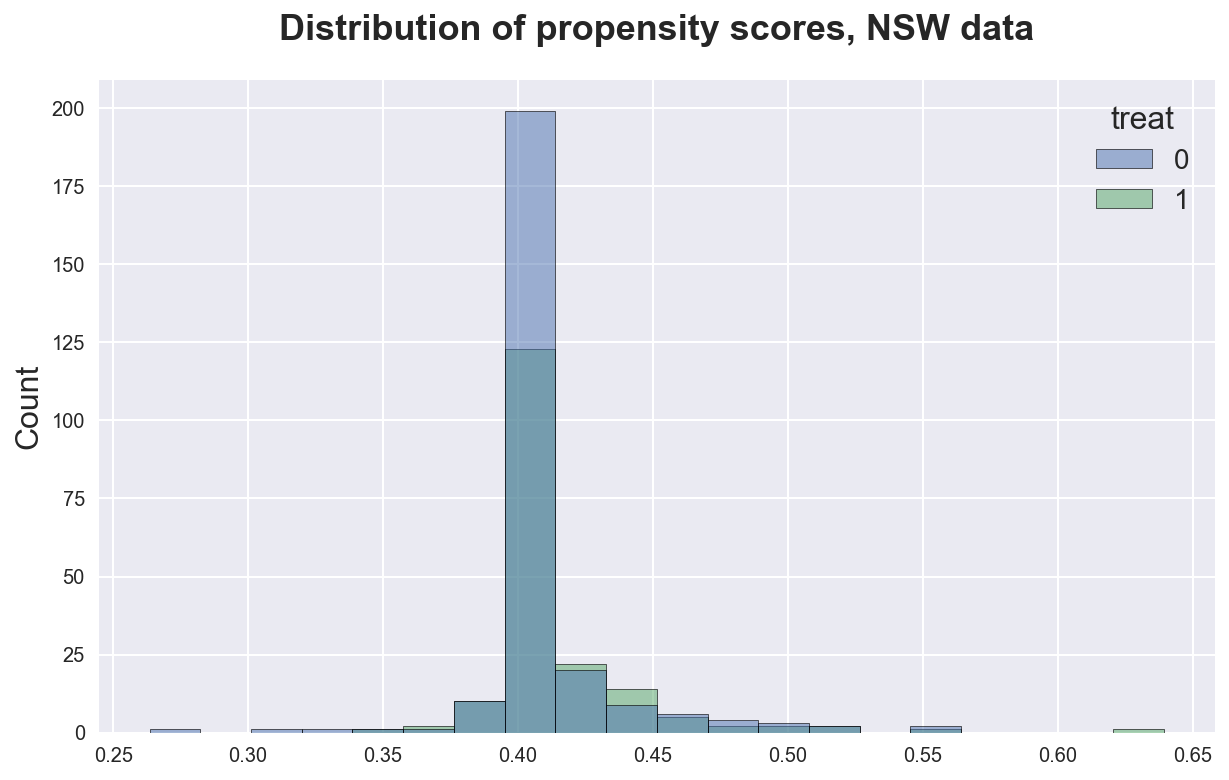

In [18]:
sns.histplot(data=df_nsw, x='pscore', hue=T, bins=20)\
.set(title='Distribution of propensity scores, NSW data', xlabel='');

Indeed, now the distribution of the p-scores is concentrated around the treatment frequency in the data. Remarkably, the standard deviation is extremely tight.

## References

- [The central role of the propensity score in observational studies for causal effects](https://academic.oup.com/biomet/article/70/1/41/240879) (1983) by Rosenbaum and Rubin
- [Propensity Scores](https://www.youtube.com/watch?v=8gWctYvRzk4) video lecture by Paul Goldsmith-Pinkham (Yale)
- [Propensity Scores](https://www.youtube.com/watch?v=m3Y8heXoDxE) video lecture by Stefan Wager (Stanford)